In [25]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [3]:
usarrests = pd.read_csv('USArrests.csv')
df = usarrests.copy()
df.index = df.iloc[:,0]
df = df.drop(columns = 'Unnamed: 0')
df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
hc_complete = linkage(df, 'complete')
hc_average = linkage(df, 'average')
hc_single = linkage(df, 'single')

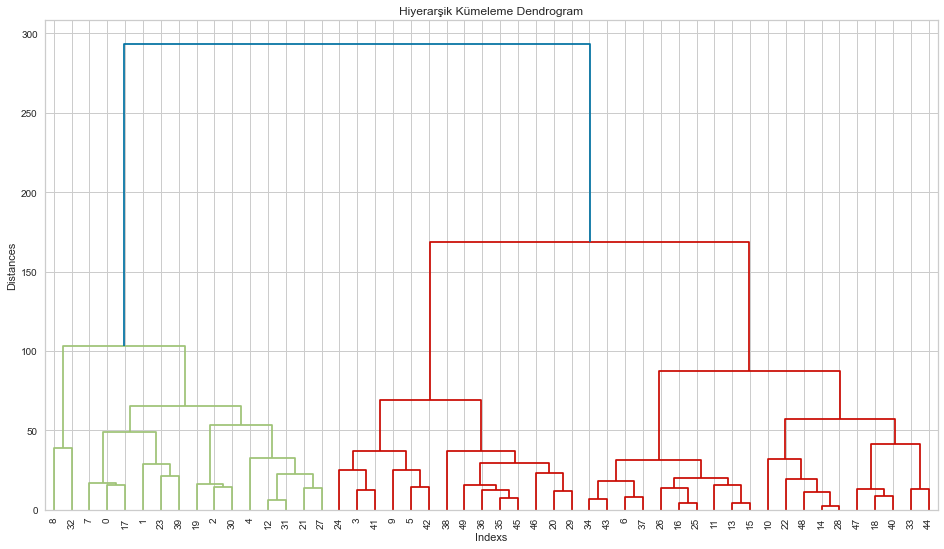

In [24]:
plt.figure(figsize = (16,9))
plt.title('Hiyerarşik Kümeleme Dendrogram')
plt.xlabel('Indexs')
plt.ylabel('Distances')
dendrogram(hc_complete, 
           leaf_font_size = 10);

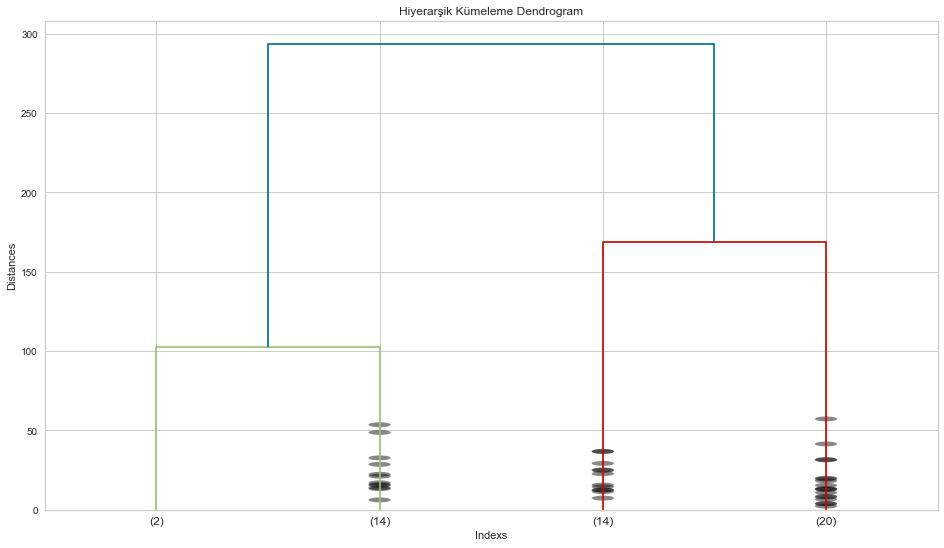

In [22]:
plt.figure(figsize = (16,9))
plt.title('Hiyerarşik Kümeleme Dendrogram')
plt.xlabel('Indexs')
plt.ylabel('Distances')
dendrogram(hc_complete, 
          truncate_mode='lastp', 
          p = 4, 
          show_contracted=True);# 4 tane kümeye ayrıldı

In [27]:
cluster = AgglomerativeClustering(n_clusters = 4,
                                  affinity = 'euclidean',
                                  linkage = 'ward')

In [32]:
agg_labels = cluster.fit_predict(df)#labels

In [34]:
pd.DataFrame({'States':df.index, 'Labels':agg_labels}).head()

,States,Labels
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
